In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%ls

'Data Dictionary.pdf'*
'Finance Challange.png'*
'Finance Challenge - 1 - EDA.ipynb'*
'Finance Challenge - 2 - Feature Engineering.ipynb'*
'Finance Challenge - 3 - Model.ipynb'*
'Finance Presentation.pptx'*
 credit_card_transaction_data_de.parquet*
 credit_card_users_de.parquet*
 joined_transactions.parquet*
 sd254_cards_de.parquet*
'~$Finance Presentation.pptx'*


In [4]:
def counts_and_perc(
    df: pd.core.frame.DataFrame, x: str, count="Counts", perc="Percentage %"
) -> pd.core.frame.DataFrame:
    """Given a pandas df and a column x in it, return the value counts summary
      with both counts and percentage
    Parameters
    ----------
    df : pd.DataFrame
    x : str
        Column to compute counts for, contained in the dataframe df
    count : str
        Name for the count column
    perc : str
        Name for the percentage column

    Returns
    -------
    pd.DataFrame with counts and ratio of counts
    """
    # if x not in df.columns:
    #     raise Exception(f"The dataframe does not contain the column {x}")
    counts_df = df[x].value_counts(dropna=False).to_frame(name=count)
    counts_df = (
        counts_df.merge(
            (df[x].value_counts(normalize=True, dropna=False) * 100)
            .round(4)
            .to_frame(name=perc),
            left_index=True,
            right_index=True,
        )
        .reset_index()
        .rename(columns={"index": x})
    )
    return counts_df

## Transactions 

In [5]:
transactions = pd.read_parquet('credit_card_transaction_data_de.parquet')

In [8]:
transactions.shape

(6877837, 15)

In [14]:
transactions

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4136,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,None,No
4137,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,None,No
4138,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,91750.0,7538,None,No
4139,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No
4140,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386727,1999,1,2019,12,30,11:38,66.53,Chip Transaction,2910328604019547969,Milford,NH,3055.0,7538,None,No
24386728,1999,1,2019,12,30,12:03,99.67,Chip Transaction,1641456720718814353,Merrimack,NH,3054.0,5411,None,No
24386729,1999,1,2019,12,30,18:44,93.63,Chip Transaction,-5501892381419303127,Merrimack,NH,3054.0,5651,None,No
24386730,1999,1,2019,12,30,20:09,67.60,Online Transaction,-6160036380778658394,ONLINE,None,NaN,4121,None,No


In [115]:
# How many nulls?
(transactions.isna().sum()/len(transactions)*100).round(2)

User               0.00
Card               0.00
Year               0.00
Month              0.00
Day                0.00
Time               0.00
Amount             0.00
Use Chip           0.00
Merchant Name      0.00
Merchant City      0.00
Merchant State    12.52
Zip               13.20
MCC                0.00
Errors?           98.41
Is Fraud?          0.00
dtype: float64

In [116]:
transactions['User'].nunique()

1610

In [117]:
counts_and_perc(transactions, 'Card')

,Card,Counts,Percentage %
0,0,2588338,37.6330
1,1,1798429,26.1482
2,2,1242107,18.0596
3,3,740142,10.7613
4,4,317952,4.6228
5,5,130945,1.9039
6,6,47235,0.6868
7,7,11897,0.1730
8,8,792,0.0115


In [118]:
transactions['Merchant Name'].nunique()

60343

In [11]:
# Clean the amounts field, remove $
transactions['Amount'] = transactions['Amount'].str.replace('$', '', regex=True).astype(float)

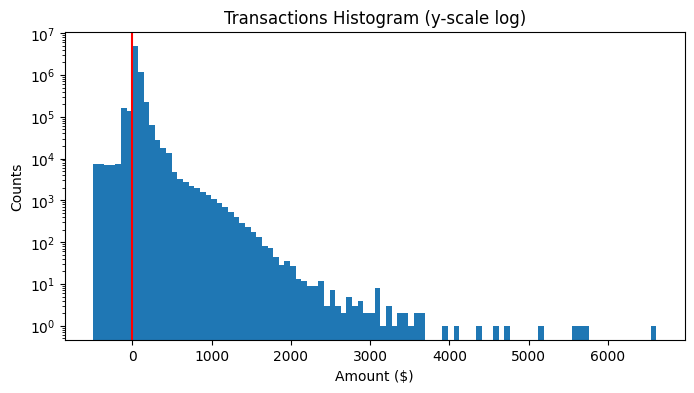

In [120]:
fig, ax = plt.subplots(figsize=(8, 4))
transactions['Amount'].plot(kind='hist', bins=100, ax=ax)
plt.axvline(x=0, color='red', linestyle='-')
plt.xlabel('Amount ($)')
plt.ylabel('Counts')
plt.title('Transactions Histogram (y-scale log)')
plt.yscale('log')
plt.show()

In [121]:
counts_and_perc(transactions, 'Use Chip')

,Use Chip,Counts,Percentage %
0,Chip Transaction,4854212,70.5776
1,Swipe Transaction,1168768,16.9932
2,Online Transaction,854857,12.4292


In [122]:
counts_and_perc(transactions, 'Is Fraud?')

,Is Fraud?,Counts,Percentage %
0,No,6869425,99.8777
1,Yes,8412,0.1223


In [123]:
counts_and_perc(transactions, 'Merchant State')

,Merchant State,Counts,Percentage %
0,None,860764,12.5150
1,CA,726357,10.5608
2,TX,500317,7.2743
3,NY,395212,5.7462
4,FL,370749,5.3905
...,...,...,...
164,Montenegro,4,0.0001
165,Nicaragua,3,0.0000
166,Suriname,3,0.0000
167,Azerbaijan,2,0.0000


In [125]:
transactions['DateCombined'] = pd.to_datetime(transactions['Year'].astype(str)+\
                                '-'+transactions['Month'].astype(str).str.zfill(2)+\
                                '-'+transactions['Day'].astype(str).str.zfill(2))

In [126]:
# Create a date range
date_range = pd.date_range(start = transactions['DateCombined'].min(), 
                           end = transactions['DateCombined'].max(),
                           freq='D')

In [127]:
assert len(date_range) == transactions['DateCombined'].nunique(), 'Missing Dates'

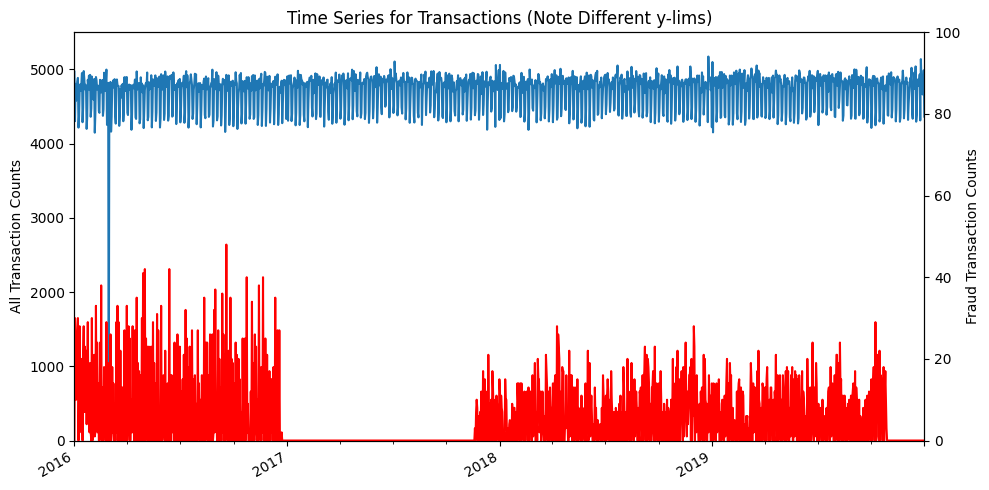

In [128]:
fig, ax1 = plt.subplots(figsize=(10, 5))
transactions['DateCombined'].value_counts().sort_index().plot(ax=ax1)
ax1.set_ylabel('All Transaction Counts')
ax1.set_ylim(0, 5500)

ax2 = ax1.twinx()
transactions[transactions['Is Fraud?'] == 'Yes']['DateCombined']\
        .value_counts().sort_index().reindex(date_range).fillna(0).plot(ax=ax2, color='red')
ax2.set_ylabel('Fraud Transaction Counts')
ax2.set_ylim(0, 100)

plt.xlabel('Date')
plt.title('Time Series for Transactions (Note Different y-lims)')
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

In [129]:
# Create a time range
daily_time_range = pd.date_range(start = '2016-01-01', end = '2016-01-02', freq='min').strftime('%H:%M')

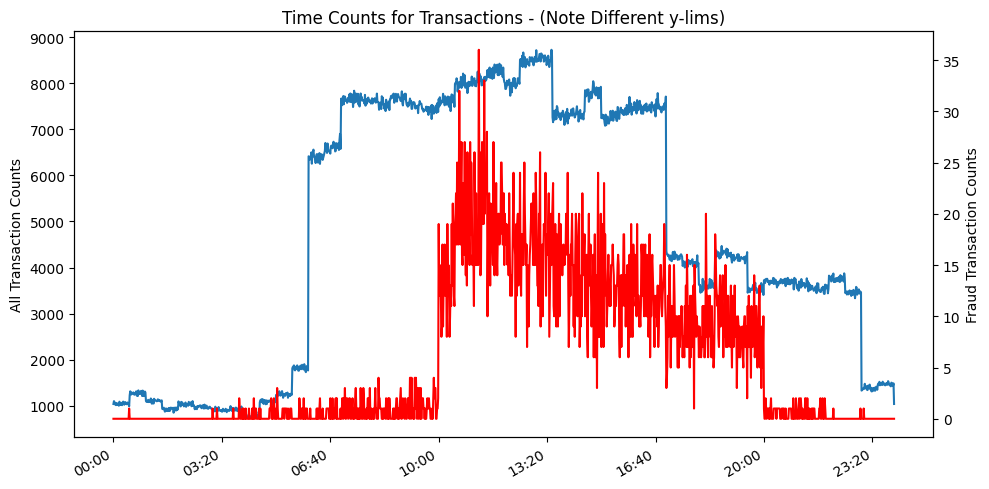

In [130]:
fig, ax1 = plt.subplots(figsize=(10, 5))
transactions['Time'].value_counts().sort_index().reindex(daily_time_range).fillna(0).plot(ax=ax1)
ax1.set_ylabel('All Transaction Counts')
#ax1.set_ylim(0, 5500)

ax2 = ax1.twinx()
transactions[transactions['Is Fraud?'] == 'Yes']['Time']\
        .value_counts().sort_index().reindex(daily_time_range).fillna(0).plot(ax=ax2, color='red')
ax2.set_ylabel('Fraud Transaction Counts')
#ax2.set_ylim(0, 100)

plt.xlabel('Date')
plt.title('Time Counts for Transactions - (Note Different y-lims)')
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

In [131]:
transactions.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'DateCombined'],
      dtype='object')

In [132]:
transactions.groupby('Is Fraud?')['Errors?'].value_counts()

Is Fraud?  Errors?                              
No         Insufficient Balance                     66782
           Bad PIN                                  16293
           Technical Glitch                         13674
           Bad Card Number                           4276
           Bad Expiration                            3328
           Bad CVV                                   3323
           Bad Zipcode                                582
           Bad PIN,Insufficient Balance               155
           Insufficient Balance,Technical Glitch      119
           Bad PIN,Technical Glitch                    38
           Bad Card Number,Insufficient Balance        36
           Bad CVV,Insufficient Balance                26
           Bad Card Number,Bad CVV                     23
           Bad Expiration,Insufficient Balance         21
           Bad Card Number,Bad Expiration              18
           Bad Expiration,Bad CVV                      17
           Bad Expirati

## Users 

In [133]:
users = pd.read_parquet('credit_card_users_de.parquet')

In [134]:
users.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [142]:
counts_and_perc(users, 'Current Age')

,Current Age,Counts,Percentage %
0,18,77,3.85
1,47,47,2.35
2,49,44,2.20
3,22,43,2.15
4,50,43,2.15
...,...,...,...
75,98,2,0.10
76,94,2,0.10
77,101,1,0.05
78,93,1,0.05


In [143]:
counts_and_perc(users, 'Gender')

,Gender,Counts,Percentage %
0,Female,1016,50.8
1,Male,984,49.2


In [144]:
counts_and_perc(users, 'State')

,State,Counts,Percentage %
0,CA,244,12.20
1,TX,159,7.95
2,FL,131,6.55
3,NY,125,6.25
4,IL,87,4.35
5,OH,86,4.30
6,PA,84,4.20
7,NC,78,3.90
8,GA,65,3.25
9,MI,60,3.00


In [145]:
counts_and_perc(users, 'Num Credit Cards')

,Num Credit Cards,Counts,Percentage %
0,3,449,22.45
1,1,416,20.80
2,2,388,19.40
3,4,376,18.80
4,5,206,10.30
5,6,105,5.25
6,7,40,2.00
7,8,17,0.85
8,9,3,0.15


## Cards

In [16]:
cards = pd.read_parquet('sd254_cards_de.parquet')

In [148]:
cards.head(20)

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
5,1,0,Visa,Credit,4404898874682993,09/2003,736,YES,1,$27500,09/2003,2012,No
6,1,1,Visa,Debit,4001482973848631,07/2022,972,YES,2,$28508,02/2011,2011,No
7,1,2,Mastercard,Debit,5627220683410948,06/2022,48,YES,2,$9022,07/2003,2015,No
8,1,3,Mastercard,Debit (Prepaid),5711382187309326,11/2020,722,YES,2,$54,06/2010,2015,No
9,1,4,Mastercard,Debit (Prepaid),5766121508358701,02/2023,908,YES,1,$99,07/2006,2012,No


In [149]:
counts_and_perc(cards, 'User')

,User,Counts,Percentage %
0,1327,9,0.1464
1,729,9,0.1464
2,116,9,0.1464
3,1098,8,0.1302
4,1425,8,0.1302
...,...,...,...
1995,1610,1,0.0163
1996,717,1,0.0163
1997,1605,1,0.0163
1998,741,1,0.0163


In [150]:
counts_and_perc(cards, 'CARD INDEX')

,CARD INDEX,Counts,Percentage %
0,0,2000,32.5415
1,1,1584,25.7729
2,2,1196,19.4598
3,3,747,12.1542
4,4,371,6.0364
5,5,165,2.6847
6,6,60,0.9762
7,7,20,0.3254
8,8,3,0.0488


In [151]:
cards['Card Number'].duplicated().sum()

0

In [152]:
counts_and_perc(cards, 'Has Chip')

,Has Chip,Counts,Percentage %
0,YES,5500,89.4891
1,NO,646,10.5109


In [153]:
counts_and_perc(cards, 'Cards Issued')

,Cards Issued,Counts,Percentage %
0,1,3114,50.6671
1,2,2972,48.3567
2,3,60,0.9762


In [154]:
counts_and_perc(cards, 'Year PIN last Changed')

,Year PIN last Changed,Counts,Percentage %
0,2020,1208,19.6551
1,2011,809,13.1630
2,2010,712,11.5848
3,2012,477,7.7611
4,2013,465,7.5659
5,2009,456,7.4195
6,2014,397,6.4595
7,2015,341,5.5483
8,2008,303,4.9300
9,2016,234,3.8074


In [155]:
counts_and_perc(cards, 'Card on Dark Web')

,Card on Dark Web,Counts,Percentage %
0,No,6146,100.0
